In [1]:
import math
import cmath
import random

def DFT(l, n=None, inverse=False):
    if not n:
        n = len(l)
    resp = []
    for i in range(n):
        x = 0.0
        for j in range(len(l)):
            if inverse:
                x += l[j] * cmath.exp(-1j * 2.0 * math.pi  * i * j / n)
            else:
                x += l[j] * cmath.exp(1j * 2.0 * math.pi  * i * j / n)
            
        if inverse:
            resp.append(x)
        else:
            resp.append(x / len(l))
            
    return resp

import matplotlib.colors as pltc
    
colors = list(pltc.cnames.keys())


In [2]:
from scipy.integrate import odeint
import pylab as plt
import numpy as np

def get_f(a1=1, a2=1, b1=1, b2=1):
    
    def f(xy, t):
        x, y = xy
        
        return [(a1 - b1*y)*x, (-a2 + b2*x)*y]
    
    return f

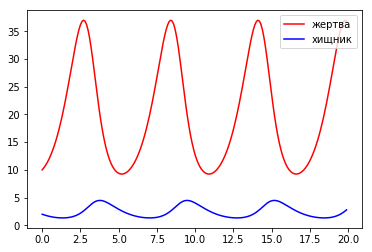

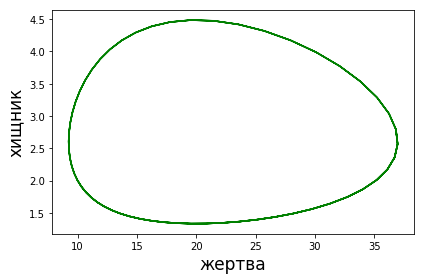

In [3]:
t = [0.1*i for i in range(200)]
xy0 = [10, 2]
    
dxy = odeint(get_f(a1=1.3,b1=0.5,a2=1,b2=0.05), xy0, t)

x = [i[0] for i in dxy]
y = [i[1] for i in dxy]

plt.plot(t, x, 'r')
plt.plot(t, y, 'b')
plt.legend(["жертва", "хищник"], loc=1)
plt.show()

plt.plot(x, y, 'g')
plt.xlabel('жертва', fontsize=17)
plt.ylabel('хищник', fontsize=17)
plt.tight_layout()
plt.show()

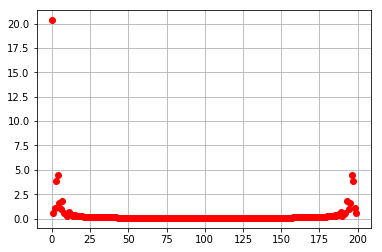

In [4]:
dft_x = DFT(x)

M = []
for i in range(len(dft_x)):
    M.append(math.sqrt(dft_x[i].real**2 + dft_x[i].imag**2))

plt.plot(np.arange(200), M, 'ro')
plt.grid(True)
plt.show()

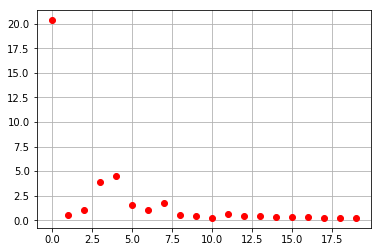

In [5]:
n = 20

plt.plot(np.arange(n), M[:n], 'ro')
plt.grid(True)
plt.show()

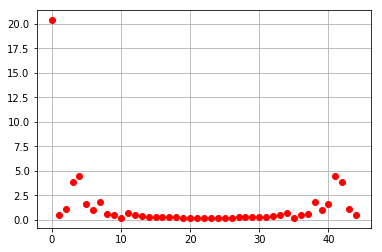

In [6]:
filt = [i for i in M if i > 0.2]

plt.plot(np.arange(len(filt)), filt, 'ro')
plt.grid(True)
plt.show()

/home/zaber/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


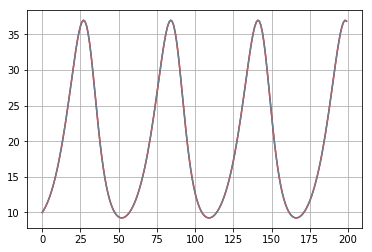

In [7]:

plt.plot(np.arange(len(x)), x, 'r')

def real(x):
    return math.sqrt(x.real**2 + x.imag**2)

l = [i for i in range(1, 10)]
l.append(50)
l.append(100)
l.append(150)

for i in [200]:
    dft_x = DFT(x, n=i)
    nx = DFT(dft_x, n=len(x), inverse=True)
    plt.plot(np.arange(len(nx)), nx, color=random.choice(colors))

plt.grid(True)
plt.show()

/home/zaber/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


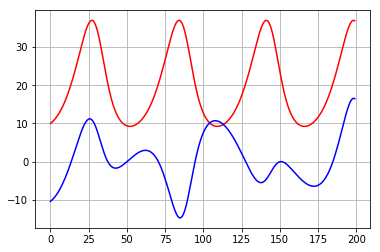

In [8]:

plt.plot(np.arange(len(x)), x, 'r')

def real(x):
    return math.sqrt(x.real**2 + x.imag**2)

dft_x = DFT(x)

f = [i for i in dft_x if real(i) < 20]
nx = DFT(f, n=len(x), inverse=True)
plt.plot(np.arange(len(nx)), nx, 'b')

plt.grid(True)
plt.show()